## PS2-5 Kernelizing the Perceptron

#### (a)

##### i.

Recall the update rule

$$\theta^{(i + 1)} := \theta^{(i)} + \alpha \big( y^{(i + 1)} - h_{\theta^{(i)}} (\phi (x^{(i + 1)})) \big) \phi (x^{(i + 1)})$$

We can easily figure out that $\theta^{(i)}$ is a linear combination of $\phi (x^{(1)}), \dots , \phi (x^{(i)})$, that is

\begin{align*}
\theta^{(i)} & = \sum_{j = 1}^{i} \beta_j \phi (x^{(j)}) \\
\theta^{(0)} & = \vec{0}
\end{align*}

##### ii.

\begin{align*}
h_{\theta^{(i)}} (\phi (x^{(i + 1)})) & = \mathrm{sign} ((\theta^{(i)})^T \phi (x^{(i + 1)})) \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j \phi (x^{(j)})^T \phi (x^{(i + 1)}) \big) \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j \langle \phi (x^{(j)}) , \phi (x^{(i + 1)}) \rangle \big) \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j K(x^{(j)}, x^{(i + 1)}) \big)
\end{align*}

##### iii.

\begin{align*}
\theta^{(i + 1)} : & = \theta^{(i)} + \alpha \big( y^{(i + 1)} - h_{\theta^{(i)}} (\phi (x^{(i + 1)})) \big) \phi (x^{(i + 1)}) \\
                   & = \sum_{j = 1}^{i} \beta_j \phi (x^{(j)}) + \underbrace{\alpha ( y^{(i + 1)} - \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j K(x^{(j)}, x^{(i + 1)}) \big) )}_{\beta_{i + 1}} \phi (x^{(i + 1)}) \\
                   & = \sum_{j = 1}^{i + 1} \beta_j \phi (x^{(j)})
\end{align*}

Therefore, the new update rule is:

$$\beta_{i + 1} := \alpha ( y^{(i + 1)} - \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j K(x^{(j)}, x^{(i + 1)}) \big) )$$

#### (b)

In [1]:
def initial_state():
    """Return the initial state for the perceptron.

    Returns:
        An array of tuples. Each tuple comprises a training example and the corresponding `beta`.
    """
    return []

In [2]:
def predict(state, kernel, x_i):
    """Perform a prediction on a given instance x_i given the current state and the kernel.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        x_i: A vector containing the features for a single instance

    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    return sign(sum(beta * kernel(x, x_i) for beta, x in state))

In [3]:
def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    beta_i = learning_rate * (y_i - sign(sum(beta * kernel(x, x_i) for beta, x in state)))
    state.append((beta_i, x_i))

#### (c)

Copy over the remaining code from `p05_percept.py` (no change on logic):

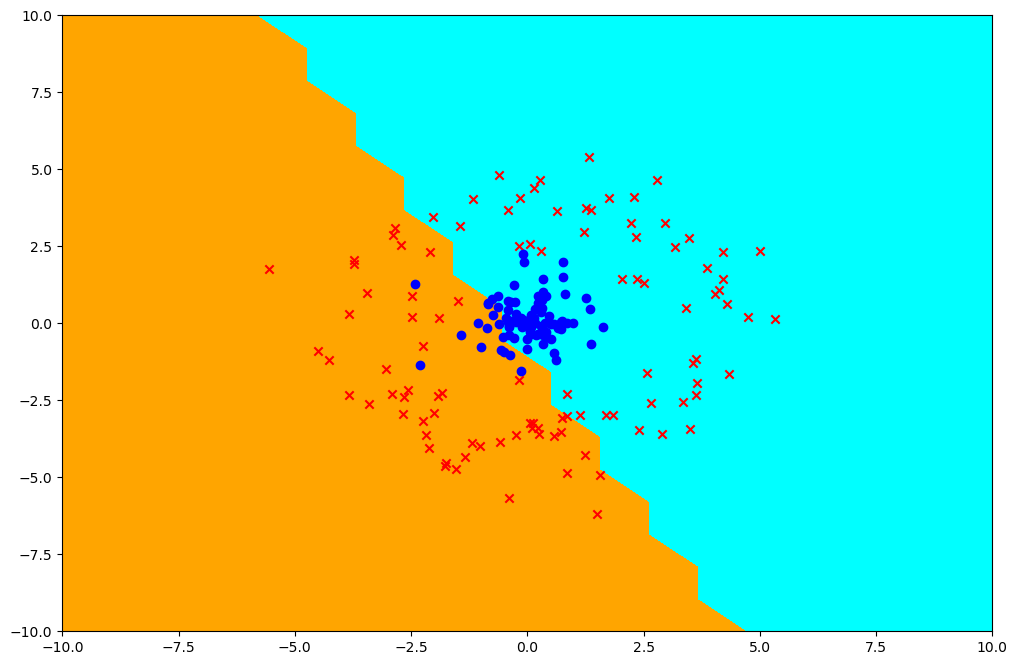

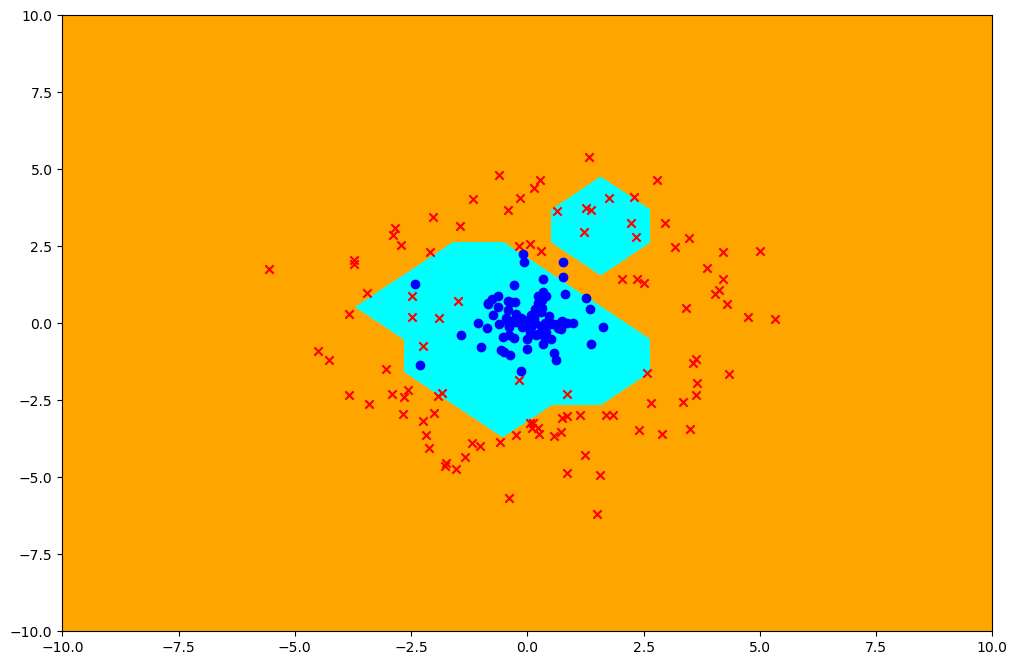

In [4]:
import math

import matplotlib.pyplot as plt
import numpy as np

import src.util as util


def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('data/ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('data/ds5_test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)


train_perceptron('dot', dot_kernel, 0.5)
train_perceptron('rbf', rbf_kernel, 0.5)

For the product kernel, there is no feature mapping for the input attributes. In other words, the model is still linear
after applying the product kernel. As a consequence, it performs badly on the data that are not linearly separable.